QUAC 609  
January, 2025  
Tomomi Nakamura
# Lab1
## Practical Entanglement Distillation – Model Development

## Introduction

   In the current digitalized lifestyle, internetworking plays a crucial role in our daily lives. However, the high demands on the internet overload the bottlenecks of computer network architecture. For example, our modern network architecture is unable to withstand complex computations, such as high-dimensional data, NP-hard problems, and various types of cyber attacks. With the arrival of quantum computers, we expect to address current issues in communication using key components of quantum mechanics, including superposition, entanglement, and quantum interference. Quantum computer networks differ from classical network architecture primarily in their use of qubits instead of bits, enabling superposition and entanglement. Quantum networks utilize quantum channels (like optical fibers and free-space links) to transmit quantum information, offering theoretically unbreakable security through quantum key distribution (QKD). Additionally, quantum repeaters and quantum error correction are used to extend communication range and handle errors, which are more complex than classical error correction methods.

# Key Distinctions: Quantum vs. Classical Communication Networks

One of the main components of quantum mechanics is qubits and entanglement. Qubits are the basic units of quantum information, which can exist in superpositions of states and can be entangled with other qubits. Entanglement is a quantum phenomenon where qubits become interconnected such that the state of one qubit instantaneously affects the state of another, regardless of the distance between them. Entanglement is crucial for quantum communication protocols such as quantum teleportation, superdense coding, and quantum key distribution (QKD).

Qubits are often realized using physical systems such as photons, ions, or superconducting circuits, which are very prone to subtle environmental noise. Reducing noise and decoherence and enhancing the quality of entangled quantum states are critical for successful quantum communication transmission. 

## Overview of Practical Entanglement Distillation

One of the critical challenges in quantum computer networks is error correction. **Entanglement Distillation** is a process in quantum communication to extract a smaller number of high-fidelity entangled pairs from a larger number of low-fidelity pairs, thereby improving the overall quality of entanglement.

Here are techniques to enhance entanglement fidelity through distillation:

1. **Purification Protocols (BBPSSW, DEJMPS):**  
Use multiple copies of entangled pairs and perform local operations and classical communication (LOCC) to iteratively improve the fidelity of the remaining pairs. 

2. **Procrustean Method:**  
Selectively measure and filter out low-fidelity entangled pairs. The remaining pairs have higher fidelity. The Procrustean method is a straightforward and practical approach to quickly improve the fidelity of entangled pairs by discarding those that do not meet a certain quality threshold.

3. **Breeding Protocol:**  
Two pairs of entangled qubits are combined using LOCC. One pair is measured, and the measurement result is used to correct the other pair, resulting in a higher-fidelity entangled pair. This is a specific type of purification protocol.
In this lab, the DEJMPS protocol is used to demonstrate the distillation of noisy entangled Bell states.

## Methodology for Formulating an Optimization Model for Entanglement Distillation

In entanglement distillation, the main purpose is to generate a maximally entangled state $|\phi^+\rangle$ from many copies of imperfect entangled states, using only LOCC operations. To similate entanglement distillation, I am going to use the DEJMPS protocol to improve fidelity of a mixed bell state with initial fidelity of 0.7. 

## DEJMPS Protocol
The DEJMPS protocol is used to improve the fidelity of entangled pairs through local operations and classical communication (LOCC).

$$
\begin{align*}
|\Phi^{\pm}\rangle_{AB} &= \frac{1}{\sqrt{2}}(|0\rangle_A \otimes |0\rangle_B \pm |1\rangle_A \otimes |1\rangle_B), \\
|\Psi^{\pm}\rangle_{AB} &= \frac{1}{\sqrt{2}}(|0\rangle_A \otimes |1\rangle_B \pm |1\rangle_A \otimes |0\rangle_B),
\tag{1}
\end{align*}
$$

where $A$ and $B$ represent Alice and Bob. The Bell-diagonal state, by definition, is diagonal in the Bell basis that can be expressed as

$$
\rho_{\text{diag}} = p_1 | \Phi^+\rangle \langle \Phi^+ | + p_2 | \Psi^+\rangle \langle \Psi^+ | + 
p_3 | \Phi^-\rangle \langle \Phi^- | + p_4 | \Psi^-\rangle \langle \Psi^- |,
\tag{2}
$$

with $p_1 > p_2 \geq p_3 \geq p_4$ and $p_1 + p_2 + p_3 + p_4 = 1$. Then State fidelity is described as:  
$$
F = \langle \Phi^+|\rho_{\text{diag}}|\Phi^+\rangle = p_1
\tag{3}
$$

In this simulation, I am going to use $[p_1, p_2, p_3, p_4]$ = [0.7, 0.15, 0.1, 0.05] in order to create a mixed state with fidelity of 0.7.

1. Alice($A$) and Bob($B$) possess two copies of entangled qubit: ${[ A_0, B_0 ]}, {[ A_1, B_1 ]}$. ${[ A_0, B_0 ]}$ are the memory qubit pair after distillation. 

2. Alice performs $R_x(\pi/2)$ gates on both qubits, and Bob performs $R_x(-\pi/2)$ gates on both qubits.

3. Then, Alice and Bob both apply a CNOT gate on their qubits. Here, they choose $A_0,B_0$ as the control qubits and $A_1,B_1$ as the target qubits.

4. Two remote parties measure the target qubits and use a classical communication channel to exchange their measurement results $m_{A_1}, m_{B_1}$.

5. If the measurement results of Alice and Bob are the same (00 or 11), the distillation is successful, and the qubit pair $A_0, B_0$ is stored as state $\rho_{out}$; If the measurement results are different (01 or 10), they claim the distillation failed and the qubit pair $A_0, B_0$ will be discarded.

After the distillation, the final state $\rho_{out}$ of entangled pair $A_0, B_0$ will have a higher fidelity than the initial state $\rho$. The fidelity of the final state $F_{out}$ is

$$
F_{out} = \frac{p_1^2 + p_4^2}{(p_1 + p_4)^2 + (p_2 + p_3)^2}
\tag{4}
$$
And the probability of a successful distillation is
$$
p_{succ} = (p_1 + p_4)^2 + (p_2 + p_3)^2
\tag{5}
$$

Given the probabilities $[p_1, p_2, p_3, p_4] = [0.7, 0.15, 0.1, 0.05]$, we can calculate $ F_{\text{out}} $ and $ p_{\text{succ}} $ as follows:


   $$ F_{\text{out}} = \frac{p_1^2 + p_4^2}{(p_1 + p_4)^2 + (p_2 + p_3)^2} = \frac{0.49 + 0.0025}{0.5625 + 0.0625} = \frac{0.4925}{0.625} \approx 0.788  \tag{6} $$


   $$ p_{\text{succ}} = (p_1 + p_4)^2 + (p_2 + p_3)^2 = 0.5625 + 0.0625 = 0.625 \tag{7}$$



## Python-Based Optimization Model Development
Based on the entanglement distillation methodology above, I am going to simulate the entanglement distillation model with the DEJMPS protocol, and after that, find the maximized angle of $R_x$ gate to optimize the model in order to obtain a result with higher fidelity.

In [3]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import DensityMatrix, Statevector, partial_trace, state_fidelity
from qiskit_aer.noise import NoiseModel, depolarizing_error, amplitude_damping_error
import numpy as np
import matplotlib.pyplot as plt


#### Step 1: Create Mixed Bell States

In [4]:
# Step 1: Ideal Bell state |Φ+⟩
# Define the ideal target state (Bell state)
bell_state = QuantumCircuit(2, name='pure_bell_state')
bell_state.h(0)
bell_state.cx(0, 1)
pure_bell_state = DensityMatrix.from_instruction(bell_state)
pure_bell_state.draw('latex')

<IPython.core.display.Latex object>

In [5]:
# Step 2: Noisy Bell state
# Define the Bell states
phi_plus = pure_bell_state

# Create the other Bell states
bell_state_minus = QuantumCircuit(2)
bell_state_minus.h(0)
bell_state_minus.cx(0, 1)
bell_state_minus.z(1)
phi_minus = DensityMatrix.from_instruction(bell_state_minus)

bell_state_psi_plus = QuantumCircuit(2)
bell_state_psi_plus.h(0)
bell_state_psi_plus.cx(0, 1)
bell_state_psi_plus.x(1)
psi_plus = DensityMatrix.from_instruction(bell_state_psi_plus)

bell_state_psi_minus = QuantumCircuit(2)
bell_state_psi_minus.h(0)
bell_state_psi_minus.cx(0, 1)
bell_state_psi_minus.x(1)
bell_state_psi_minus.z(1)
psi_minus = DensityMatrix.from_instruction(bell_state_psi_minus)

# Define the fidelity distribution
fidelity_distribution = [0.7, 0.15, 0.1, 0.05]

# Create the noisy Bell state as a mixture of the four Bell states
noisy_bell_state = (
    fidelity_distribution[0] * phi_plus +
    fidelity_distribution[1] * phi_minus +
    fidelity_distribution[2] * psi_plus +
    fidelity_distribution[3] * psi_minus
)

print("\nNoisy Bell State with given probabilities:")
noisy_bell_state.draw('latex')


Noisy Bell State with given probabilities:


<IPython.core.display.Latex object>

In [6]:
new_fidelity = state_fidelity(noisy_bell_state, pure_bell_state)
print(f"Fidelity of the new noisy Bell state: {new_fidelity}")
bell_density_matrix = noisy_bell_state.tensor(noisy_bell_state)

Fidelity of the new noisy Bell state: 0.7000000057421198


#### Step 2: Define the DEJMPS Operation 

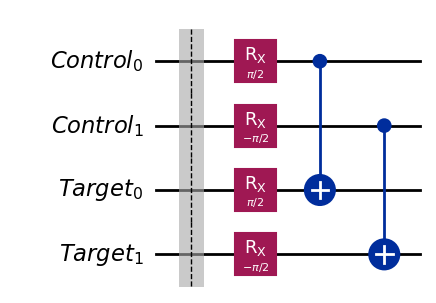

In [7]:
# Step 3: Define the Dejmps operation as a quantum circuit
def dejmps_operation(angle):
    C = QuantumRegister(2, 'Control')
    T = QuantumRegister(2, 'Target')
    qc = QuantumCircuit(C, T)

    # Local rotations (simulate LOCC steps)
    qc.barrier()
    qc.rx(float(angle), C[0])  # Alice's first qubit
    qc.rx(float(angle), T[0])  # Alice's second qubit
    qc.rx(-float(angle), C[1])   # Bob's first qubit
    qc.rx(-float(angle), T[1])   # Bob's second qubit

    # Bilocal CNOT gates
    qc.cx(C[0], T[0])  # Between first and second copy (Alice's qubits)
    qc.cx(C[1], T[1])  # Between first and second copy (Bob's qubits)
 
    return qc

dejmps_qc = dejmps_operation(np.pi/2)
dejmps_qc.draw('mpl')

In [8]:
# Step 4: Use DensityMatrix.evolve to apply the Dejmps operation
final_density_matrix = bell_density_matrix.evolve(dejmps_qc)
final_density_matrix.draw('latex')

<IPython.core.display.Latex object>

#### Step 3: Measure Fidelity and Probability of Success

In [9]:
# Step 5: Measure the fidelity and success rate
def measure_fidelity_and_success_rate(density_matrix, shots=1024):
    # Measure qubits A1 and B1 (qubits 2 and 3 in the combined system)
    measured_density_matrices = []
    success_count = 0

    for _ in range(shots):
        outcome, measured_density_matrix = density_matrix.measure([2, 3])
        if outcome in ['00', '11']:
            success_count += 1
            filtered_density_matrix = partial_trace(measured_density_matrix, [2, 3])
            measured_density_matrices.append(filtered_density_matrix)

    # Calculate fidelity
    fidelity = 0
    for dm in measured_density_matrices:
        fidelity += state_fidelity(dm, pure_bell_state)
    fidelity /= len(measured_density_matrices)

    # Calculate success rate
    success_rate = success_count / shots

    return fidelity, success_rate

# Call the function
fidelity, success_rate = measure_fidelity_and_success_rate(final_density_matrix)
print(f"Success Rate: {success_rate}")
print(f"Fidelity: {fidelity}")


Success Rate: 0.6240234375
Fidelity: 0.7880000052644045


Here, Compared to the Fidelity $ F_{\text{out}} \approx 0.788$ and Success Rate $ p_{\text{out}} \approx 0.625$ that are theoritically calculated in (6), (7), Fidelity is very close; However, the success rate is slightly (0.001) lower.  
The fidelity was improved by 8% from 0.70 as estimated in the methodology.

#### Step 4: Optimize the Model
To optimize, I tested the model for different angles to find the best angle for $R_x$ Gate to result in the highest fidelity. 

In [10]:
# Define the range of angles to test
angle_range = np.linspace(0, 2 * np.pi, 100)

# Lists to store fidelity and success rate values at each iteration
angles = []
fidelity_values = []
success_rate_values = []

# Evaluate the objective function at each angle
for angle in angle_range:
    dejmps_qc = dejmps_operation(angle)
    bell_density_matrix = noisy_bell_state.tensor(pure_bell_state)
    final_density_matrix = bell_density_matrix.evolve(dejmps_qc)
    fidelity, success_rate = measure_fidelity_and_success_rate(final_density_matrix)
    angles.append(angle)
    fidelity_values.append(fidelity)
    success_rate_values.append(success_rate)

# Find the angle that maximizes the fidelity
best_angle = angles[np.argmax(fidelity_values)]
highest_fidelity = max(fidelity_values)

print(f"Best RX Gate Angle: {best_angle}")
print(f"Highest Fidelity: {highest_fidelity}")

Best RX Gate Angle: 1.5866629563584815
Highest Fidelity: 0.9333020125542674


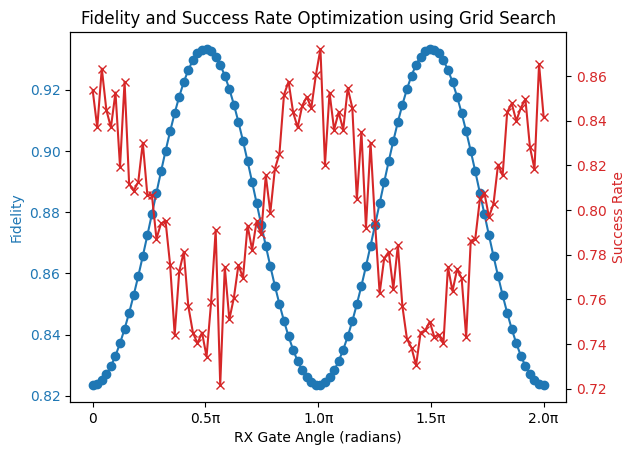

In [13]:
import matplotlib.ticker as ticker

# Plot the fidelity and success rate values against the angles
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('RX Gate Angle (radians)')
ax1.set_ylabel('Fidelity', color=color)
ax1.plot(angles, fidelity_values, marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Success Rate', color=color)
ax2.plot(angles, success_rate_values, marker='x', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Set x-axis to display in terms of 0, π/2, π, 3π/2, 2π
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=np.pi / 2))
ax1.xaxis.set_major_formatter(ticker.FuncFormatter(lambda val, pos: f'{float(val / np.pi)}π' if val != 0 else '0'))

plt.title('Fidelity and Success Rate Optimization using Grid Search')
plt.show()

### Result:
- The $R_X$ gate angles $\pi/2$ and $3\pi/2$ correspond to rotations that can effectively correct certain types of errors in the entangled pairs, leading to higher fidelity.

- The $R_X$ gate angles $0$, $\pi$, and $2\pi$ correspond to no rotation or full rotations, which might not disturb the initial state significantly. These angles may result in higher success rates because they do not introduce additional errors or misalignments that could cause the distillation process to fail.

## Reference
1. https://github.com/PaddlePaddle/Quantum/blob/master/tutorials/locc/EntanglementDistillation_DEJMPS_EN.ipynb
2. https://en.wikipedia.org/wiki/Entanglement_distillation
3. Rozpędek, F., Schiet, T., Thinh, L.P., Elkouss, D., Doherty, A.C. and Wehner, S., 2018. Optimizing practical entanglement distillation. Physical Review A, 97(6), p.062333.